In [1]:
from sklearn.model_selection import train_test_split
import torch
import sys
import os
from model import RNNTrainer,VanilaRNN
import numpy as np

import matplotlib.pyplot as plt
#путь к корню директории
BASE_DIR = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(os.path.abspath(BASE_DIR))
from data_preparation import PreparationDataset
from show_analysis import LossVisualizer

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [4]:
path = BASE_DIR + '\data_all'  # Путь к данным
PD = PreparationDataset(path)

# параметры подготовки данных
window_size=10
num_features=9
downsample_step=50 # 0.003 * downsample_step = шаг данных в секундах
target_window_size = 1 # output size количество выходных данных для 1 примера
# Подготовка данных
X, y, df = PD.many_to_many(
    window_size=window_size,
    num_features=num_features,
    downsample_step=downsample_step,
    target_window_size=target_window_size,
    device=device  
)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([14407, 10, 9]),
 torch.Size([7097, 10, 9]),
 torch.Size([14407, 1]),
 torch.Size([7097, 1]))

In [5]:
model = VanilaRNN( 
    input_size = X_train.shape[2],
    output_size = 1,
    hidden_size = 32,
    #output_sw = target_window_size,
    num_layers = 1,
    device = device)

trainer = RNNTrainer(
    model=model,
    learning_rate=0.001,
    device= device
)


In [10]:
#возможность загрузитиь параметры в модель
# model.load_state_dict(torch.load('up_tree_weight.pth'))
# model = model.to(device)
#возможность сохранить параметры модели
#torch.save(model.state_dict(), 'Quantum_weight3.pth')

In [6]:

history = trainer.fit(
    X=X_train,
    y=y_train,
    X_t=X_test,
    y_t=y_test,
    batch_size=64,
    epochs=200,
    loss_tube=5
)

Epoch 10
Main: 2.293598, MAPE: 0.856295
Test - MAPE: 0.849682, Tube: 0.000000
Epoch 40
Main: 2.246334, MAPE: 0.831898
Test - MAPE: 0.833038, Tube: 0.000000
Epoch 80
Main: 2.247970, MAPE: 0.832000
Test - MAPE: 0.833038, Tube: 0.000000
Epoch 120
Main: 2.244571, MAPE: 0.831765
Test - MAPE: 0.833038, Tube: 0.000000
Epoch 160
Main: 2.246972, MAPE: 0.831992
Test - MAPE: 0.833038, Tube: 0.000000
Epoch 200
Main: 2.246582, MAPE: 0.831697
Test - MAPE: 0.833038, Tube: 0.000000


In [5]:
LV = LossVisualizer(history)

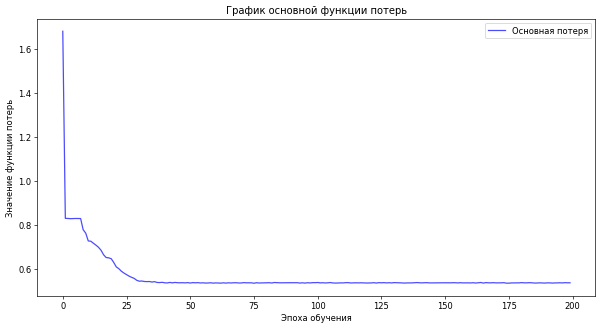

In [6]:
LV.show_training_loss()

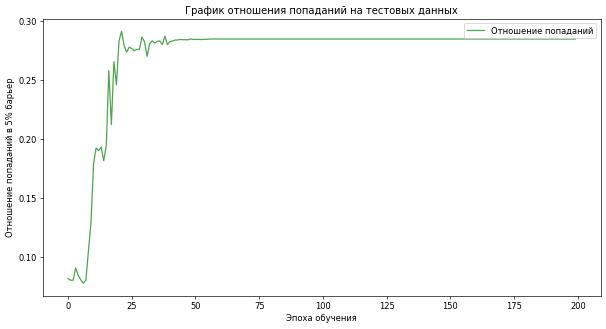

In [8]:
LV.show_test_tube()

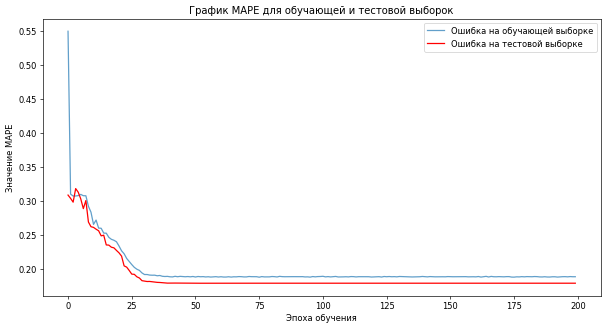

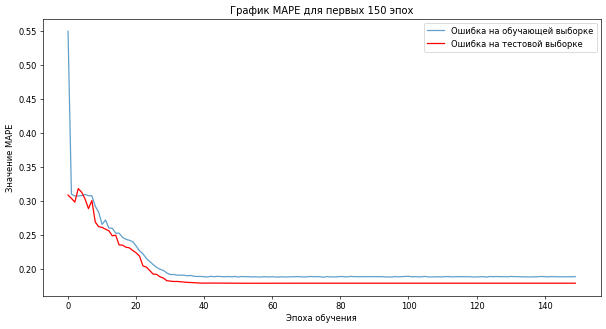

In [9]:
LV.show_mape()

In [14]:
LV.histogram_mape(model,X_train,y_train,limit_percel = 5)

OutOfMemoryError: CUDA out of memory. Tried to allocate 2.00 MiB. GPU 

Количество записей: 5334


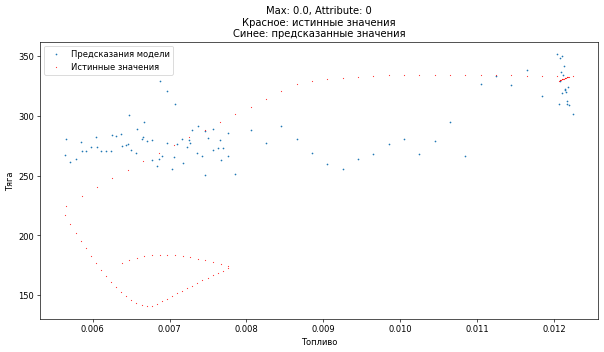

Количество записей: 5334


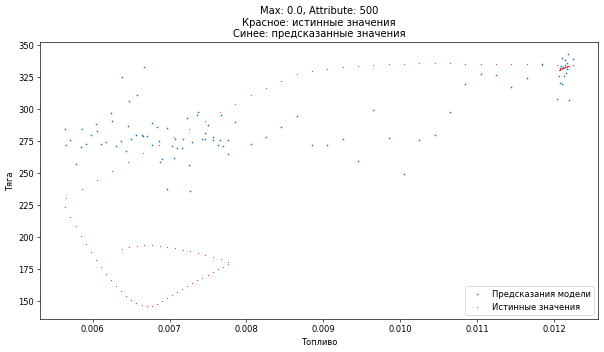

Количество записей: 5334


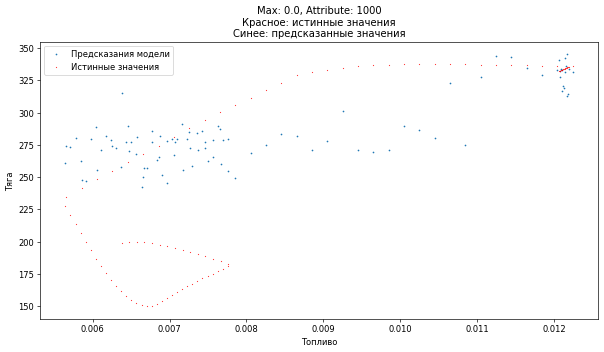

Количество записей: 5334


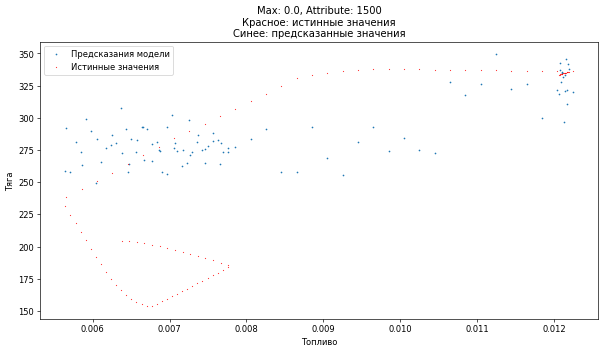

Количество записей: 5334


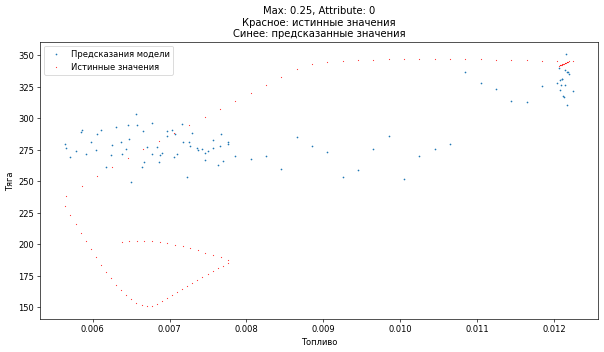

Количество записей: 5334


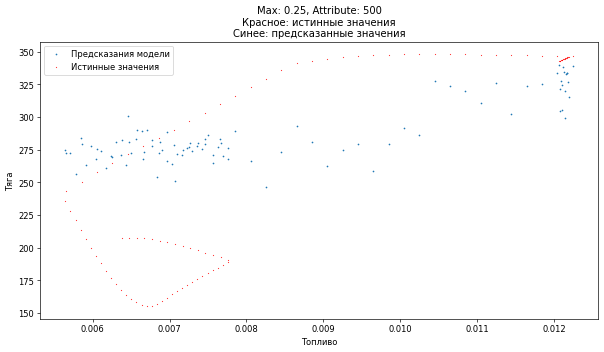

Количество записей: 5334


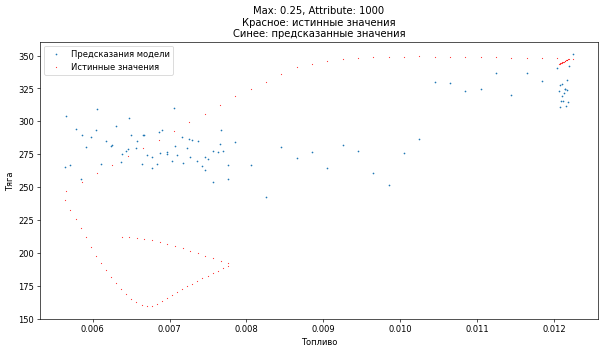

Количество записей: 5334


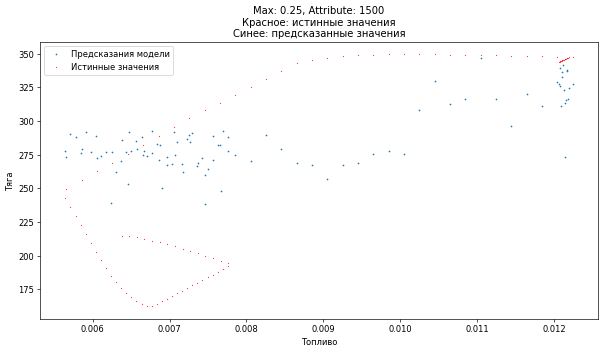

Количество записей: 5334


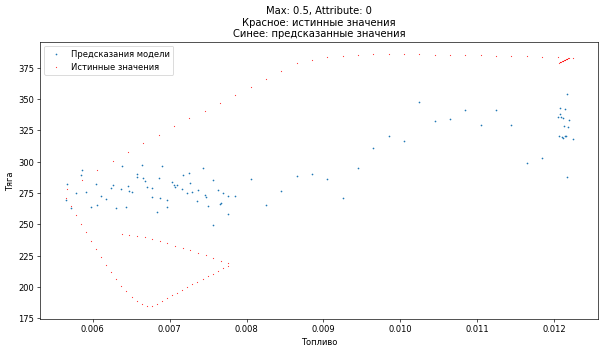

Количество записей: 5334


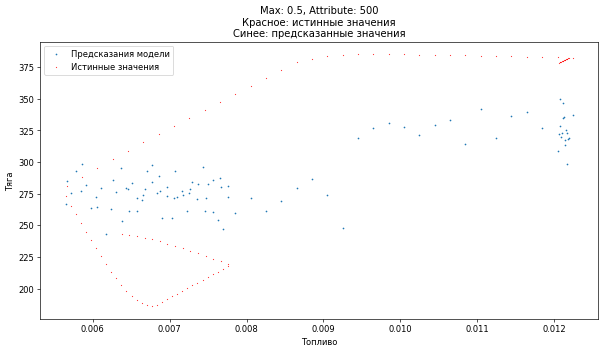

Количество записей: 5334


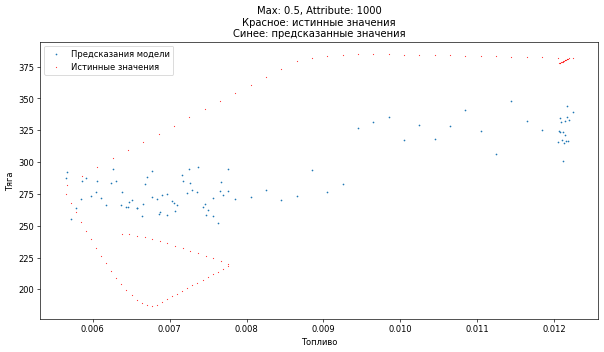

Количество записей: 5334


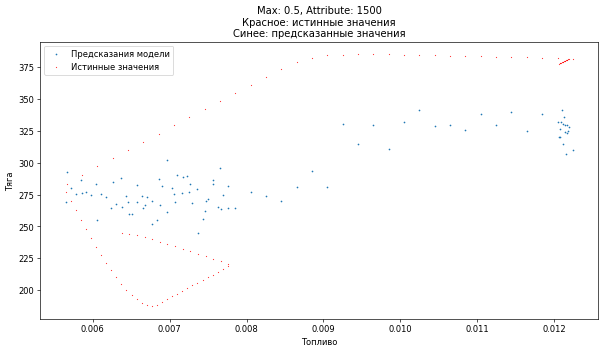

Количество записей: 5334


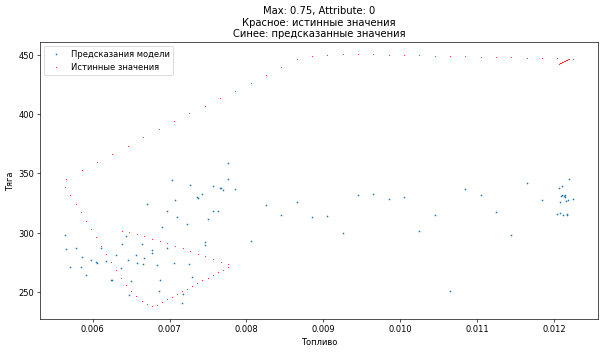

Количество записей: 5334


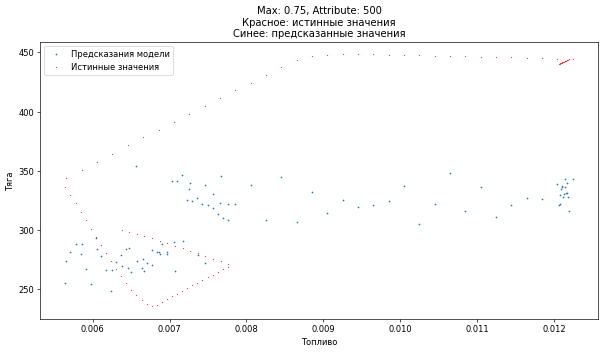

Количество записей: 5334


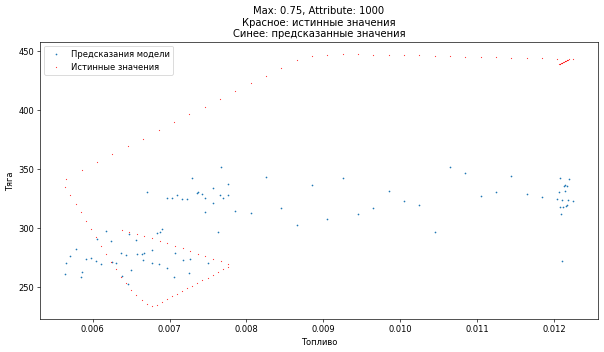

Количество записей: 5334


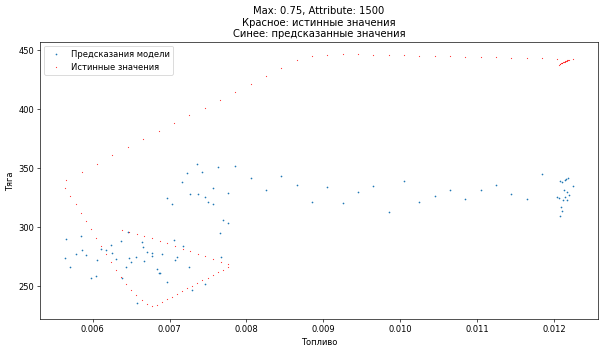

Количество записей: 5334


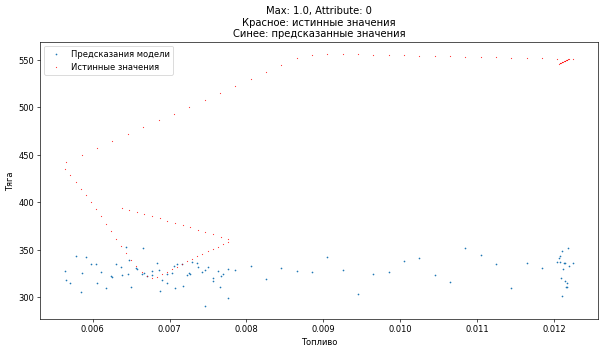

Количество записей: 5334


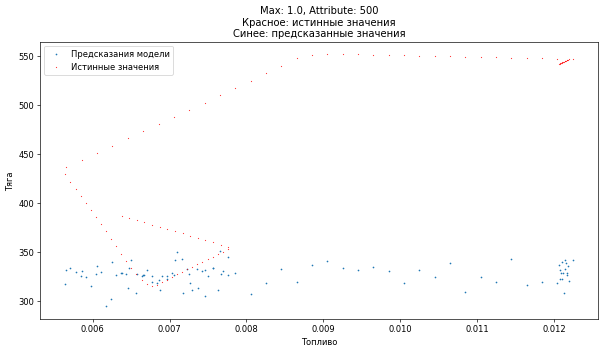

Количество записей: 5334


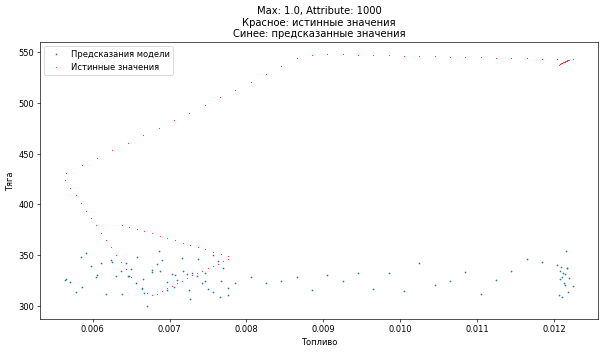

Количество записей: 5334


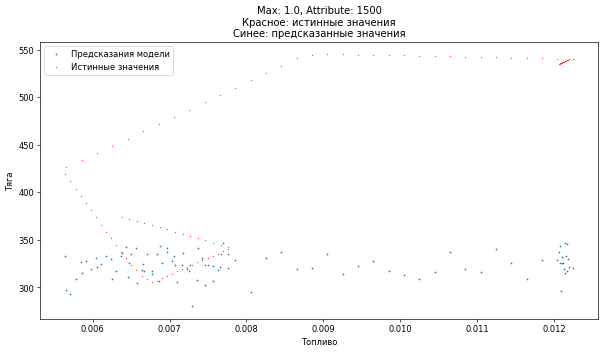

In [11]:
LV.show_predictions_rnn(model,df,device)